In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/train_lenta.csv")
df_test = pd.read_csv("data/test_lenta.csv")

df.shape, df_test.shape

((714510, 195), (170297, 193))

In [2]:
cols_agg = {}
for col in df.columns.to_list():
    cols_agg[col.split('_')[0]] = cols_agg.get(col.split('_')[0], []) + [col]

cols_agg.keys()

dict_keys(['age', 'cheque', 'children', 'crazy', 'disc', 'food', 'gender', 'k', 'main', 'mean', 'months', 'perdelta', 'promo', 'response', 'sale', 'stdev', 'target', 'treatment'])

In [3]:
len(cols_agg['cheque']), len(cols_agg['k']), len(cols_agg['sale'])

(44, 94, 33)

In [4]:
cols_agg['age'], \
cols_agg['children'], \
cols_agg['disc'], \
cols_agg['gender'], \
cols_agg['main'], \
cols_agg['mean'], \
cols_agg['months'], \
cols_agg['perdelta'], \
cols_agg['food'], \
cols_agg['promo'], \
cols_agg['response']

(['age'],
 ['children'],
 ['disc_sum_6m_g34'],
 ['gender'],
 ['main_format'],
 ['mean_discount_depth_15d'],
 ['months_from_register'],
 ['perdelta_days_between_visits_15_30d'],
 ['food_share_15d', 'food_share_1m'],
 ['promo_share_15d'],
 ['response_sms', 'response_viber'])

In [5]:
cols_agg['crazy']

['crazy_purchases_cheque_count_12m',
 'crazy_purchases_cheque_count_1m',
 'crazy_purchases_cheque_count_3m',
 'crazy_purchases_cheque_count_6m',
 'crazy_purchases_goods_count_12m',
 'crazy_purchases_goods_count_6m']

In [6]:
cols_agg['stdev']

['stdev_days_between_visits_15d',
 'stdev_discount_depth_15d',
 'stdev_discount_depth_1m']

In [7]:
df['disc_sum_6m_g34'].describe()

count    711228.000000
mean        167.953813
std         477.514910
min           0.000000
25%           2.500000
50%          37.090000
75%         150.622500
max       77979.170000
Name: disc_sum_6m_g34, dtype: float64

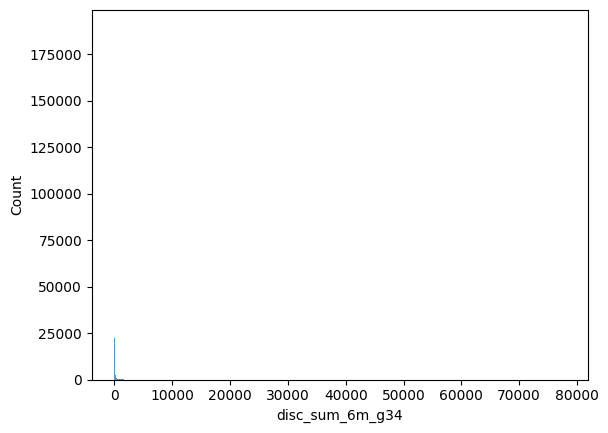

In [8]:
import seaborn as sns


sns.histplot(df['disc_sum_6m_g34'])
plt.show()

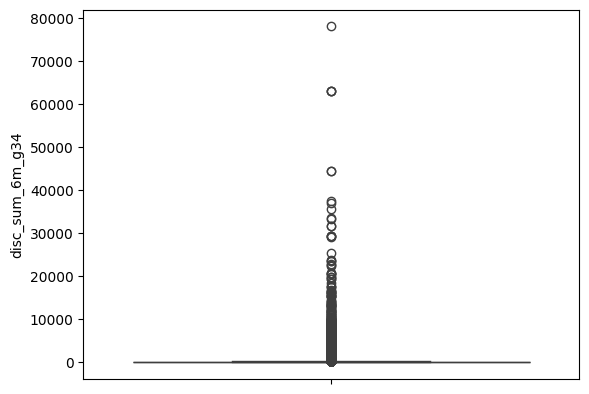

In [14]:
sns.boxplot(df['disc_sum_6m_g34'])
plt.show()

Seems like outlier

In [9]:
df[df['disc_sum_6m_g34'] > 10000][['age', 'disc_sum_6m_g34']]

,age,disc_sum_6m_g34
5288,58.0,10954.82
7615,60.0,16419.91
20918,33.0,25280.99
39062,29.0,62938.88
47615,50.0,10360.41
...,...,...
671695,44.0,33502.84
689185,56.0,33236.14
694167,35.0,13304.24
698575,39.0,14115.65


In [10]:
df['stdev_days_between_visits_15d'].describe()

count    634432.000000
mean          0.292277
std           0.911318
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.192400
Name: stdev_days_between_visits_15d, dtype: float64

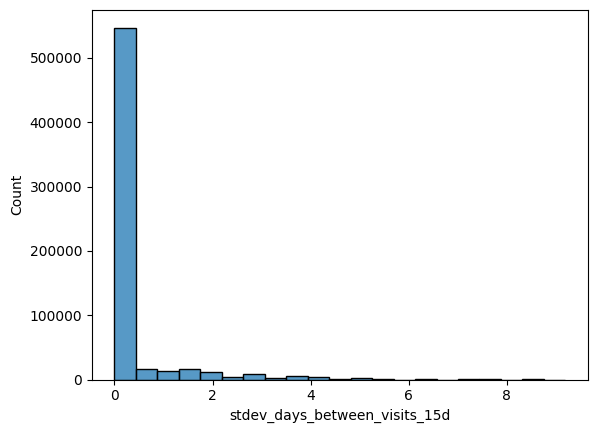

In [11]:
sns.histplot(df['stdev_days_between_visits_15d'])
plt.show()

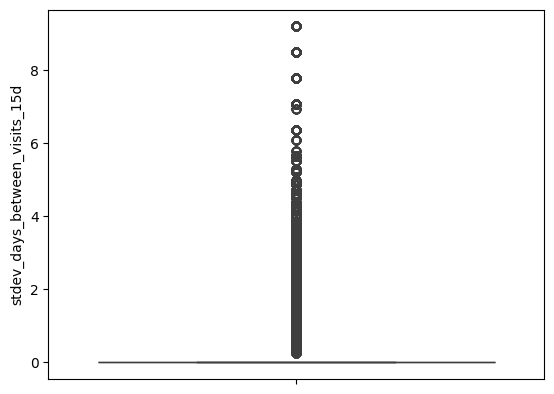

In [12]:
sns.boxplot(df['stdev_days_between_visits_15d'])
plt.show()

In [13]:
df['stdev_days_between_visits_15d'].isna().sum(), df_test['stdev_days_between_visits_15d'].isna().sum()

(80078, 19194)